## ALLURE Chatbot Data

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("words")
# from enchant.checker import SpellChecker

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\klakk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [3]:
data = pd.read_csv('../../data/real-world/allure/final/final.csv')

In [4]:
data.head()

,C_num,UB,User_gender,Text
0,1,0,0,"Hello, welcome to ALLURE! I'm Ally and I want ..."
1,1,0,0,Today we'll learn the different moves you need...
2,1,0,0,Would you like to hear more about the white c...
3,1,1,0,Level 1
4,1,0,0,Level: 1


In [80]:
# Each dialog is a series of turns.
data_groups = data.groupby('C_num')

# Calculate the difference between consecutive rows. If it is 1, calculate the number of times this difference is 1.
num_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum())
avg_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum()).mean()

print("C_num denotes conversation number.")
print(num_dialogues)

print("The average number of dialogues are: ")
print(round(avg_dialogues,2))

C_num denotes conversation number.
C_num
1     18
2     21
3     30
4     49
5     71
6     22
7     41
8     33
9     37
10    29
11    22
12    27
13    20
14     5
15    27
16    30
17    28
18    33
Name: UB, dtype: int64
The average number of dialogues are: 
30.17


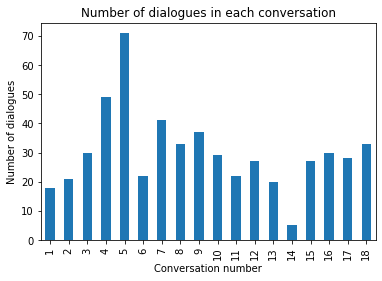

In [84]:
# Draw a graph
num_dialogues.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of dialogues')
plt.title('Number of dialogues in each conversation')
plt.show()

In [86]:
data_groups = data.groupby('C_num')
bot_utterances = data_groups['UB'].apply(lambda x: (x == 0).sum())
bot_utterances_avg = data_groups['UB'].apply(lambda x: (x == 0).sum()).mean()
user_utterances = data_groups['UB'].apply(lambda x: (x == 1).sum())
user_utterances_avg = data_groups['UB'].apply(lambda x: (x == 1).sum()).mean()


print("C_num denotes conversation number.")
print("Number of bot utterances in each conversation: ")
print(bot_utterances)
print("Average number of bot utterances are: ")
print(round(bot_utterances_avg,2))


C_num denotes conversation number.
Number of bot utterances in each conversation: 
C_num
1      75
2      88
3     120
4     188
5     277
6      90
7     169
8     120
9     153
10    115
11     89
12    102
13     83
14     16
15    115
16     98
17    107
18    109
Name: UB, dtype: int64
Average number of bot utterances are: 
117.44


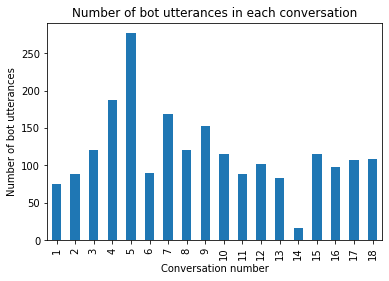

In [87]:
bot_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of bot utterances')
plt.title('Number of bot utterances in each conversation')
plt.show()

In [88]:
print("Number of user utterances in each conversation: ")
print(user_utterances)
print("Average number of user utterances are: ")
print(round(user_utterances_avg,2))

Number of user utterances in each conversation: 
C_num
1     18
2     23
3     32
4     83
5     83
6     22
7     42
8     36
9     43
10    38
11    22
12    27
13    20
14     7
15    27
16    35
17    29
18    39
Name: UB, dtype: int64
Average number of user utterances are: 
34.78


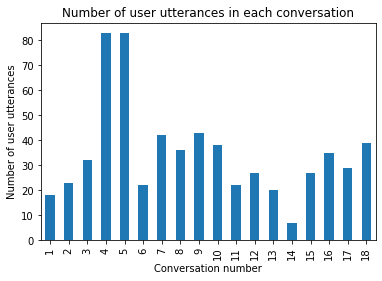

In [89]:
user_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of user utterances')
plt.title('Number of user utterances in each conversation')
plt.show()

In [90]:
data0 = data[data['UB'] == 0]
data1 = data[data['UB'] == 1]

In [95]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [101]:
print("Average number of stopwords used by the chatbot: ")
print(data0['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by the user: ")
print(data1['Text'].apply(count_stop_words).mean())

Average number of stopwords used by the chatbot: 
5.581362346263009
Average number of stopwords used by the user: 
0.01437699680511182


In [133]:
data = pd.read_csv('../../data/real-world/allure/final/final.csv')
def count_typo_noise(text):
    tokens = nltk.word_tokenize(str(text).lower())
    typos = 0

    for each in tokens:
        if nltk.edit_distance(each, nltk.corpus.words.words()) > 1:
            typos = typos + 1
    
    return typos

In [148]:
num_typo_noise_bot = data[data['UB'] == 0]['Text'].apply(count_typo_noise)

In [ ]:
num_typo_noise_user = data[data['UB'] == 1]['Text'].apply(count_typo_noise)

In [ ]:
print("The average number of typo errors in the bot conversation are: ")
print(num_typo_noise_bot.mean())
print("The average number of typo errors in the user conversation are: ")
print(num_typo_noise_user.mean())